In [ ]:
#Sebastian Russo 79117092
#Bachelor Thesis
#Application of Machine Learning Techniques for the Early Detection of Diabetes: 
#A Comparative Study of Classification Models

#Library to manipulate and analyze datasets 
import pandas as pd

#Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

#For path finding
from pathlib import Path

In [ ]:
#Construct path using pathlib
data_path = Path("dataset") / "diabetes_binary_health_indicators_BRFSS2015.csv"
dataset_df = pd.read_csv(data_path)

In [ ]:
#Analyze dataset
dataset_head = dataset_df.head().to_string()
dataset_tails = dataset_df.tail().to_string()
dataset_shape = dataset_df.shape
rows, cols = dataset_shape 

#Inspect and log head, tail, dimensions and shape
print(f"Dataset head:\n{dataset_head}")
print(f"Dataset shape: {dataset_shape}")
print(f"Dataset has {cols} columns and {rows} rows")

In [ ]:
#Distribution of dependent variable
sns.countplot(x='Diabetes_binary', data=dataset_df)
plt.title("Target Variable Distribution")
plt.show()
#Class balance ratio
class_counts = dataset_df['Diabetes_binary'].value_counts()
class_percentages = dataset_df['Diabetes_binary'].value_counts(normalize=True) * 100
print(f"Class distribution:\n{class_counts}")
print(f"Class percentage:\n{class_percentages}")
print("")
print("")

#Histograms to check for outliers
dataset_outliers = dataset_df.drop(columns="Diabetes_binary")
dataset_outliers.hist(figsize=(14, 12), bins=30)
plt.tight_layout()
plt.show()



In [ ]:
#Ensure all columns are shown when printing
pd.set_option('display.max_columns', None)
#Summary statistics of numeric columns
print("Summary statistics:\n", dataset_df.describe())
print("")
print("")

#Check for missing data
missing_values = dataset_df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")
print("")
print("")

#Check for duplicate rows
duplicate_rows = dataset_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

In [ ]:
#Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation = dataset_df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [ ]:
# Correlation with target
target_corr = correlation['Diabetes_binary'].drop('Diabetes_binary').sort_values(ascending=False)
print("Correlation of features with Diabetes_binary:\n", target_corr)
plt.figure(figsize=(10, 6))
target_corr.plot(kind='barh')
plt.title("Feature Correlation with Diabetes_binary")
plt.xlabel("Correlation coefficient")
plt.gca().invert_yaxis()
plt.show()



In [ ]:
#Countplot categorical or binary features
continuous_features = ["Diabetes_binary",'BMI', 'MentHlth', 'PhysHlth']
dataset_categorical_binary = dataset_df.drop(columns=continuous_features)

for col in dataset_categorical_binary.columns:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=dataset_df, x=col, hue='Diabetes_binary')
    plt.title(f"{col} Distribution by Diabetes_binary")
    plt.xlabel(col)
    plt.ylabel("Count")

    # Custom legend
    handles = [
        mpatches.Patch(color=sns.color_palette()[0], label='No Diabetes'),
        mpatches.Patch(color=sns.color_palette()[1], label='Pre or Diabetes')
    ]
    plt.legend(handles=handles, title="Diabetes Status")

    plt.tight_layout()
    plt.show()



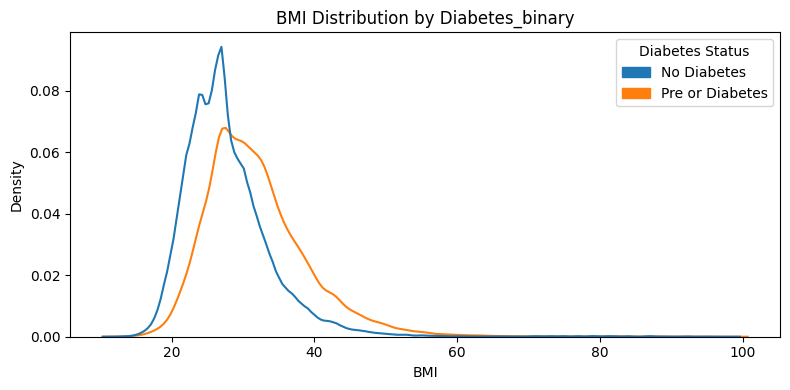

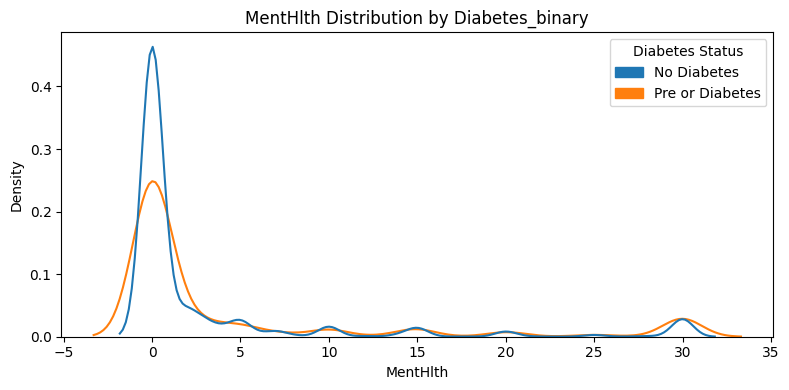

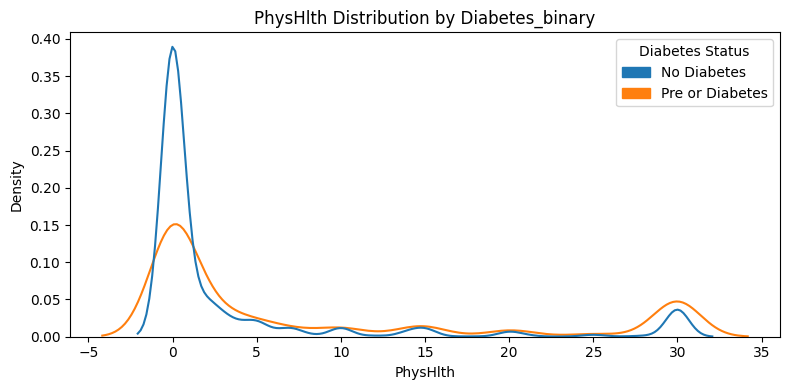

In [23]:
#Feature distributions split by target variable (KDE plots) for binary features
dataset_to_KDE = dataset_df[continuous_features]

for col in dataset_to_KDE.columns:
    if col != 'Diabetes_binary':
        plt.figure(figsize=(8, 4))
        ax = sns.kdeplot(
            data=dataset_to_KDE,
            x=col,
            hue='Diabetes_binary',
            common_norm=False,
            palette=sns.color_palette()[:2]
        )
        plt.title(f"{col} Distribution by Diabetes_binary")
        plt.xlabel(col)
        plt.ylabel("Density")

        # Custom legend
        handles = [
            mpatches.Patch(color=sns.color_palette()[0], label='No Diabetes'),
            mpatches.Patch(color=sns.color_palette()[1], label='Pre or Diabetes')
        ]
        plt.legend(handles=handles, title="Diabetes Status")

        plt.tight_layout()
        plt.show()